# Modelagem de Tópicos

Traduzido de Intuitive Guide to Latent Dirichlet Allocation Thushan Ganegedara (2018) disponível [nete link ](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158)


# A intuição por trás da Alocação de Dirichlet Latente (LDA)

A modelagem de tópicos refere-se à tarefa de identificar os tópicos que melhor descrevem um conjunto de documentos. 
Esses tópicos só surgirão durante o processo de modelagem de tópicos (portanto, chamados de latentes). 
E uma técnica popular de modelagem de tópicos é conhecida como Latent Dirichlet Allocation (LDA). Embora o nome seja um bocado complicado, o conceito por trás disso é muito simples.
Para falar brevemente, LDA imagine um conjunto fixo de tópicos. 
Cada tópico representa um conjunto de palavras. 
E o objetivo do LDA é mapear todos os documentos para os tópicos de forma que as palavras em cada documento sejam capturadas principalmente por esses tópicos imaginários.
Iremos sistematicamente passar por esse método no final, de forma que você se sinta confortável o suficiente para usá-lo por conta própria.

# Por que modelagem de tópicos?
Quais são alguns dos usos do mundo real que a modelagem de tópicos tem?   
Os historiadores podem usar o LDA para identificar eventos importantes na história, analisando o texto com base no ano.  
Bibliotecas baseadas na web podem usar LDA para recomendar livros com base em suas leituras anteriores.   
Os provedores de notícias podem usar a modelagem de tópicos para entender artigos rapidamente ou agrupar artigos semelhantes.   
Outra aplicação interessante é o agrupamento não supervisionado de imagens, em que cada imagem é tratada como um documento.   

# Qual é a grande ideia por trás do LDA?
Depois de entender a grande ideia, acho que ajuda a entender por que a mecânica em LDA é do jeito que é. Então aqui vai;

> **Cada documento pode ser descrito por uma distribuição de tópicos e cada tópico pode ser descrito por uma distribuição de palavras**

Mas por que usamos essa ideia? Vamos imaginar isso por meio de um exemplo.

# LDA em termos leigos
Digamos que você tenha um conjunto de 1000 palavras (ou seja, as 1000 palavras mais comuns encontradas em todos os documentos) e 1000 documentos.   
Suponha que cada documento tenha, em média, 500 dessas palavras aparecendo em cada um.   
Como você pode entender a qual categoria cada documento pertence?   
Uma maneira é conectar cada documento a cada palavra por um fio com base em sua aparência no documento. Algo como abaixo.
![](https://miro.medium.com/max/875/1*QQTk2TGyzhakGh0lZ9P03w.jpeg)
E então quando você vê que alguns documentos estão conectados ao mesmo conjunto de palavras.   
Você sabe que eles discutem o mesmo assunto.   
Então você pode ler um desses documentos e saber do que falam todos esses documentos.   
Mas para fazer isso você não tem fios suficientes.   
Você vai precisar de cerca de 500 * 1000 = 500.000 fios para isso.   
Mas estamos vivendo em 2100 e exaurimos todos os recursos para a fabricação de fios, então eles são tão caros e você só pode pagar 10.000 fios. Como você pode resolver esse problema?

# Vamos mais fundo para reduzir os tópicos!
Podemos resolver esse problema, introduzindo uma camada latente (ou seja, oculta). Digamos que saibamos 10 tópicos / temas que ocorrem ao longo dos documentos.   
Mas esses tópicos não são observados, nós apenas observamos palavras e documentos, portanto, os tópicos estão latentes.   
E queremos utilizar essas informações para reduzir o número de fios.   
Então o que você pode fazer é conectar as palavras aos tópicos dependendo de quão bem aquela palavra se enquadra naquele tópico e então conectar os tópicos aos documentos com base em quais tópicos cada documento aborda.
Agora, digamos que você tenha cada documento com cerca de 5 tópicos e cada tópico relacionado a 500 palavras. Ou seja, precisamos de 1000 * 5 fios para conectar documentos a tópicos e 10 * 500 fios para conectar tópicos a palavras, totalizando 10.000.
![](https://miro.medium.com/max/875/1*2uj6t3gNv76SpHrWf5-z-A.jpeg)

Nota: Os tópicos que utilizamos aqui (“Animais”, “Esportes”, “Tecnologia”) são imaginários.   
Na solução real, você não terá esses tópicos, mas algo como (0,3 * Gatos, 0,4 * Cães, 0,2 * Leal, 0,1 * Mal) representando o tópico “Animais”.   
Ou seja, como mencionado antes, cada documento é uma distribuição de palavras.

# Uma visão diferente: como os documentos são gerados de acordo com a LDA ?

Para dar mais contexto ao que está acontecendo, o LDA assume que o seguinte processo gerador está por trás de qualquer documento que você vê. Para simplificar, vamos supor que estamos gerando um único documento com 5 palavras.   

Mas o mesmo processo pode ser generalizado para M documentos com N palavras em cada um. Como um documento é gerado?
> Primeiro $\alpha$ (alfa) organize a base $\theta$ (theta) e então você vai e pega uma bola de $\theta$. 
Com base no que você escolhe, você é enviado a uma base  $\beta$ (beta). $\beta$ é organizado por $\eta$ (Eta). 
Agora você escolhe uma palavra de $\beta$ e a coloca no documento. 
Você itera este processo 5 vezes para obter 5 palavras.

![](https://miro.medium.com/max/875/1*fCc0JT3W-1ViYyw0hJ7rdA.jpeg)

Esta imagem é uma representação da aparência de um sistema LDA já aprendido. Mas, para chegar a esse estágio, você precisa responder a várias perguntas, como:  
- Como sabemos quantos tópicos existem nos documentos?
- Vejam que já temos uma bela estrutura no terreno que nos ajuda a gerar documentos sensíveis, pois os organizadores têm garantido o correto desenho do terreno. Como encontramos organizadores tão bons?
Isso será respondido mais a frente.   
Além disso, vamos ficar um pouco mais técnicos deste ponto em diante. Então aperte o cinto!
Nota: LDA não se importa com a ordem das palavras no documento. Normalmente, o LDA usa a representação de recurso de [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model)  para representar um documento.  
Faz sentido, porque, se eu pegar um documento, misturar as palavras e entregá-lo a você, você ainda pode adivinhar que tipo de tópicos são discutidos no documento.

# Ficando um pouco matemático ...
Antes de mergulhar nos detalhes. Vamos esclarecer algumas coisas, como notações e definições.
## Definições e notações
- k - Número de tópicos aos quais um documento pertence (um número fixo)
- V - Tamanho do vocabulário
- M - Número de documentos
- N - Número de palavras em cada documento
- w - Uma palavra em um documento. Isso é representado como um vetor codificado a quente de tamanho V (ou seja, V - tamanho do vocabulário)
- w (negrito w): representa um documento (ou seja, vetor de "w" s) de N palavras
- D - Corpus, uma coleção de documentos M
- z - Um tópico de um conjunto de k tópicos. Um tópico é uma distribuição de palavras. Por exemplo, pode ser Animal = (0,3 gatos, 0,4 cães, 0 AI, 0,2 Loyal, 0,1 Evil)

## Definindo a geração de documentos de maneira mais matemática
Primeiro, vamos colocar o exemplo baseado na intuição sobre a geração de documentos acima, para um desenho matemático adequado.

![Modelo gráfico do LDA.](https://miro.medium.com/max/875/1*WGsNq9tjIwhGMCEthvAmVw.jpeg)

Aqui são marcadas as formas de todas as variáveis possíveis (tanto observadas como ocultas). Mas lembre-se de que , z e $\beta$ são distribuições, não valores determinísticos

Vamos decifrar o que isso está dizendo. Temos um único valor $\alpha$ (ou seja, organizador $\theta$) que define $\theta$; a distribuição de tópicos para documentos será parecida. Temos documentos M e alguma distribuição θ para cada um desses documentos. 

Agora, para entender as coisas com mais clareza, aperte os olhos e faça aquela placa M desaparecer (supondo que haja apenas um único documento), woosh!

Agora esse único documento tem N palavras e cada palavra é gerada por um tópico. Você gera N tópicos para serem preenchidos com palavras. Essas N palavras ainda são espaços reservados.

Com base em $\eta$, $\beta$ tem alguma distribuição (ou seja, uma distribuição de Dirichlet para ser mais preciso - discutida em breve) e de acordo com essa distribuição, $\beta$ gera k palavras individuais para cada tópico. 

Agora você preenche uma palavra para cada espaço reservado (no conjunto de N espaços reservados), condicionado ao tópico que ele representa.
Ao final, você tem um documento com N palavras agora!
## Por que $\alpha$ e $\eta$ são constantes?
$\alpha$ e $\eta$ são mostrados como constantes na imagem acima. 
Mas na verdade é mais complexo do que isso. Por exemplo, α tem uma distribuição de tópicos para cada documento ($\theta$ base para cada documento). 
Idealmente, uma matriz de forma (M x K). E $\eta$ tem um vetor de parâmetros para cada tópico. $\eta$ terá forma (k x V). 

No desenho acima, as constantes representam realmente matrizes e são formadas pela replicação do valor único na matriz para cada célula.

## Vamos entender $\theta$ e $\beta$ em mais detalhes
$\theta$ é uma matriz aleatória, onde $\theta_{i, j}$ representa a probabilidade do $i$-ésimo documento conter palavras pertencentes ao $j$-ésimo tópico.   
Se você der uma olhada na aparência de $\theta\ no exemplo acima, verá que as bolas estão bem dispostas nos cantos, não muito no meio.   
A vantagem de ter essa propriedade é que as palavras que produzimos provavelmente pertencem a um único tópico, como normalmente acontece com documentos do mundo real.   
Esta é uma propriedade que surge modelando $\theta$ como uma distribuição de Dirichlet. 

Similarmente, $\beta_{i, j}$ representa a probabilidade do $i$-ésimo tópico conter a $j$-ésima palavra. E $\beta$ também é uma distribuição de Dirichlet. Abaixo, estou fornecendo um rápido desvio para entender a distribuição de Dirichlet.
Desvio rápido: Compreendendo a distribuição de Dirichlet

A distribuição de Dirichlet é a generalização multivariada da distribuição Beta. 

Aqui, discutimos um exemplo de um problema tridimensional, onde temos 3 parâmetros em α que afetam a forma de $\theta$ (ou seja, distribuição). 

Para uma distribuição de Dirichlet N-dimensional, você tem um vetor de comprimento N como $\alpha$. 

Você pode ver como a forma de $\theta$ muda com diferentes valores de α. Por exemplo, você pode ver como o gráfico superior central mostra uma forma semelhante $\theta$.
A lição principal é a seguinte:

>Valores de $\alpha$ grandes empurram a distribuição para o meio do triângulo, onde valores de α menores empurram a distribuição para os cantos.

![](https://miro.medium.com/max/875/1*3oOHy1tUfUT9Z379Alb9nA.png)

# Como aprendemos o LDA?
Ainda não respondemos. O problema real é: como sabemos os valores exatos de α e η? Antes disso, deixe-me listar a variável latente (oculta) que precisamos encontrar.
- α - Parâmetro relacionado à distribuição que rege como é a distribuição de tópicos para todos os documentos do corpus
- θ - Matriz aleatória onde θ (i, j) representa a probabilidade do iº documento conter o j ésimo tópico
- η - Parâmetro relacionado à distribuição que governa a aparência da distribuição de palavras em cada tópico
- β - Uma matriz aleatória onde β (i, j) representa a probabilidade do i ésimo tópico conter a j ésima palavra.
# Formulando o que precisamos aprender
Se devo declarar matematicamente o que estou interessado em descobrir, é o seguinte:
$$
P(\theta_{1:M},z_{1:M},\beta_{1:k}\mid \mathcal{D}; \alpha_{1:M}, \eta_{1:k}
$$
Parece assustador, mas contém uma mensagem simples. Isso basicamente quer dizer,
Eu tenho um conjunto de M documentos, cada documento tendo N palavras, onde cada palavra é gerada por um único tópico de um conjunto de K tópicos. Estou procurando a probabilidade posterior conjunta de:
- $\theta$ - Uma distribuição de tópicos, um para cada documento,
- $z$ - N tópicos para cada documento,
- $\theta$ - Uma distribuição de palavras, uma para cada tópico,
dado,
- $\mathcal{D}$ - Todos os dados que temos (ou seja, os corups), e usando parâmetros,
- $\alpha$ - Um vetor de parâmetro para cada documento (documento - Distribuição de tópicos)
- $\eta$ - Um vetor de parâmetro para cada tópico (tópico - distribuição de palavras)
Mas não podemos calcular isso muito bem, pois essa entidade é intratável. Sow como vamos resolver isso?

$$
P(\theta_{1:M},z_{1:M},\beta_{1:k}\mid \mathcal{D}; \alpha_{1:M}, \eta_{1:k}
$$

![](https://miro.medium.com/max/875/1*llcMrijX1Ln3-B3_rK4gDA.png)


# Como faço para resolver isso? Inferência variacional para o resgate

Existem muitas maneiras de resolver isso. Mas vomos nos concentrar na inferência variacional. 

A probabilidade que discutimos acima é um posterior intratável muito confuso (o que significa que não podemos calcular isso no papel e ter boas equações).  

Então, vamos aproximar isso com alguma distribuição de probabilidade conhecida que se aproxima muito do posterior verdadeiro. Essa é a ideia por trás da inferência variacional.

A maneira de fazer isso é minimizar a divergência KL entre a aproximação e a posterior verdadeira como um problema de otimização. Mais uma vez, não vou entrar em detalhes, pois isso está fora do escopo.
Mas vamos dar uma olhada rápida no problema de otimização
$$
\gamma^{*},\phi^{*},\lambda^{*}= argmin_{\gamma, \phi, \lambda}\mathcal{D}(\theta,z,\beta\mid\gamma,\phi,\lambda)\mid\mid p(\mathcal{D}\alpha,\eta)
$$
$\gamma, \phi, \lambda$ representam os parâmetros variacionais livres com os quais aproximamos $\theta,z e\beta$, respectivamente. Aqui, D (q || p) representa a divergência KL entre q e p. 

E mudando γ, ϕ e λ, obtemos diferentes distribuições de q com diferentes distâncias do verdadeiro p posterior. Nosso objetivo é encontrar os γ *, ϕ * e λ * que minimizam a divergência KL entre a aproximação q e o verdadeiro p posterior.

Com tudo bem definido, é apenas uma questão de resolver iterativamente o problema de otimização acima até que a solução convirja. Depois de ter γ *, ϕ * e λ *, você terá tudo o que precisa no modelo LDA final.

Discutimos sobre a Alocação de Dirichlet latente (LDA). LDA é um método poderoso que permite identificar tópicos dentro dos documentos e mapear documentos para esses tópicos. 

O LDA tem muitos usos, como recomendar livros aos clientes.

Vimos como o LDA funciona com um exemplo de fios de conexão. 

Então vimos uma perspectiva diferente com base em como o LDA imagina que um documento é gerado.  

Finalmente, entramos no treinamento do modelo. Neste, discutimos uma quantidade significativa de matemática por trás do LDA, mantendo a matemática leve. 

Vimos como é uma distribuição de Dirichlet, qual é a distribuição de probabilidade que estamos interessados ​​em encontrar (ou seja, posterior) e como resolvemos isso usando inferência variacional.

##  Referências
Aqui estão algumas referências úteis para entender o LDA se algo não estava claro.
[Artigo original do Prof. David Blei](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)
[Um vídeo intuitivo que explica a ideia básica por trás da LDA](https://www.youtube.com/watch?v=3mHy4OSyRf0&t=1058s)
[Palestra do Prof. David Blei](https://www.youtube.com/watch?v=FkckgwMHP2s&t=1086s)

# Modelagem de tópico nos R

Traduzido do Cápitulo 5 de Text Mining with R! de Silge e Robinson (2020) disponívek [neste link](https://www.tidytextmining.com/topicmodeling.html)

Na mineração de texto, geralmente temos coleções de documentos, como postagens de blogs ou artigos de notícias, que gostaríamos de dividir em grupos naturais para que possamos entendê-los separadamente. 

A modelagem de tópicos é um método para classificação não supervisionada de tais documentos, semelhante ao agrupamento em dados numéricos, que encontra grupos naturais de itens mesmo quando não temos certeza do que estamos procurando.

A Alocação de Dirichlet Latente (LDA) é um método particularmente popular para ajustar um modelo de tópico. 

Ele trata cada documento como uma mistura de tópicos e cada tópico como uma mistura de palavras. Isso permite que os documentos se "sobreponham" em termos de conteúdo, em vez de serem separados em grupos distintos, de uma forma que espelha o uso típico da linguagem natural.

Como mostra a Figura abaixo, podemos usar princípios de texto organizados para abordar a modelagem de tópicos com o mesmo conjunto de ferramentas organizadas que usamos ao longo deste livro. 

![](https://www.tidytextmining.com/images/tmwr_0601.png)

Aprenderemos a trabalhar com objetos `LDA` do [pacote topicmodels] (https://cran.r-project.org/package=topicmodels), especialmente organizando tais modelos para que possam ser manipulados com ggplot2 e dplyr. 

Também exploraremos um exemplo de agrupamento de capítulos de vários livros, onde podemos ver que um modelo de tópico "aprende" a dizer a diferença entre os quatro livros com base no conteúdo do texto.

## Alocação de Dirichlet Latente

A Alocação Latente de Dirichlet é um dos algoritmos mais comuns para modelagem de tópicos. Sem mergulhar na matemática por trás do modelo, podemos entendê-lo como sendo guiado por dois princípios.

* ** Cada documento é uma mistura de tópicos. ** Imaginamos que cada documento pode conter palavras de vários tópicos em proporções particulares. Por exemplo, em um modelo de dois tópicos, poderíamos dizer "Documento 1 é 90% tópico A e 10% tópico B, enquanto o Documento 2 é 30% tópico A e 70% tópico B."

* ** Cada tópico é uma mistura de palavras. ** Por exemplo, poderíamos imaginar um modelo de dois tópicos de notícias americanas, com um tópico para "política" e outro para "entretenimento". As palavras mais comuns no tópico de política podem ser "Presidente", "Congresso" e "governo", enquanto o tópico de entretenimento pode ser composto por palavras como "filmes", "televisão" e "ator". É importante ressaltar que as palavras podem ser compartilhadas entre os tópicos; uma palavra como "orçamento" pode aparecer em ambos igualmente.

LDA é um método matemático para estimar ambos ao mesmo tempo: encontrar a mistura de palavras que está associada a cada tópico, enquanto também determina a mistura de tópicos que descreve cada documento. Existem várias implementações desse algoritmo e vamos explorar uma delas em profundidade.

Vamos usar o conjunto de dados `AssociatedPress` fornecido pelo pacote topicmodels, como um exemplo de DocumentTermMatrix. Esta é uma coleção de 2.246 artigos de notícias de uma agência de notícias americana, a maioria publicada por volta de 1988.

In [2]:
install.packages("topicmodels")

Installing package into 'C:/Users/domin/OneDrive/Documentos/R/win-library/4.0'
(as 'lib' is unspecified)



package 'topicmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\domin\AppData\Local\Temp\Rtmpe8LEYh\downloaded_packages


In [5]:
library(topicmodels)
data("AssociatedPress")
AssociatedPress

<<DocumentTermMatrix (documents: 2246, terms: 10473)>>
Non-/sparse entries: 302031/23220327
Sparsity           : 99%
Maximal term length: 18
Weighting          : term frequency (tf)

Podemos usar a função `LDA ()` do pacote topicmodels, definindo `k = 2`, para criar um modelo LDA de dois tópicos.

> Quase qualquer modelo de tópico na prática usará um `k` maior, mas logo veremos que esta abordagem de análise se estende a um número maior de tópicos.

Esta função retorna um objeto contendo todos os detalhes do ajuste do modelo, como como as palavras são associadas aos tópicos e como os tópicos são associados aos documentos.

In [6]:
# set a seed so that the output of the model is predictable
ap_lda <- LDA(AssociatedPress, k = 2, control = list(seed = 1234))
ap_lda

A LDA_VEM topic model with 2 topics.

Ajustar o modelo foi a "parte fácil": o resto da análise envolverá explorar e interpretar o modelo usando funções de arrumação do pacote tidytext.

### Probabilidades de tópico-palavra

O método `tidy()`, originalmente do pacote broom [@ R-broom], para organizar objetos de modelo. 

O pacote tidytext fornece este método para extrair as probabilidades por tópico por palavra, chamadas $\beta$ ("beta"), do modelo.

In [7]:
library(tidytext)

ap_topics <- tidy(ap_lda, matrix = "beta")
head(ap_topics)

Warning message:
"package 'tidytext' was built under R version 4.0.3"


topic,term,beta
<int>,<chr>,<dbl>
1,aaron,1.686917e-12
2,aaron,3.895941e-05
1,abandon,2.654910e-05
2,abandon,3.990786e-05
1,abandoned,1.390663e-04
2,abandoned,5.876946e-05


Observe que isso transformou o modelo em um formato de um tópico por termo por linha. Para cada combinação, o modelo calcula a probabilidade desse termo ser gerado a partir desse tópico. Por exemplo, o termo "aaron" tem uma probabilidade $  
1.686917 \times 10^{-12}$ de ser gerado a partir do tópico 1, mas uma probabilidade $ 3.8959408 \times 10^{-5}$ de ser gerado a partir do tópico 2.

Poderíamos usar `top_n ()` do dplyr para encontrar os 10 termos mais comuns em cada tópico. Como um quadro de dados organizado, ele se presta bem à visualização do ggplot2.

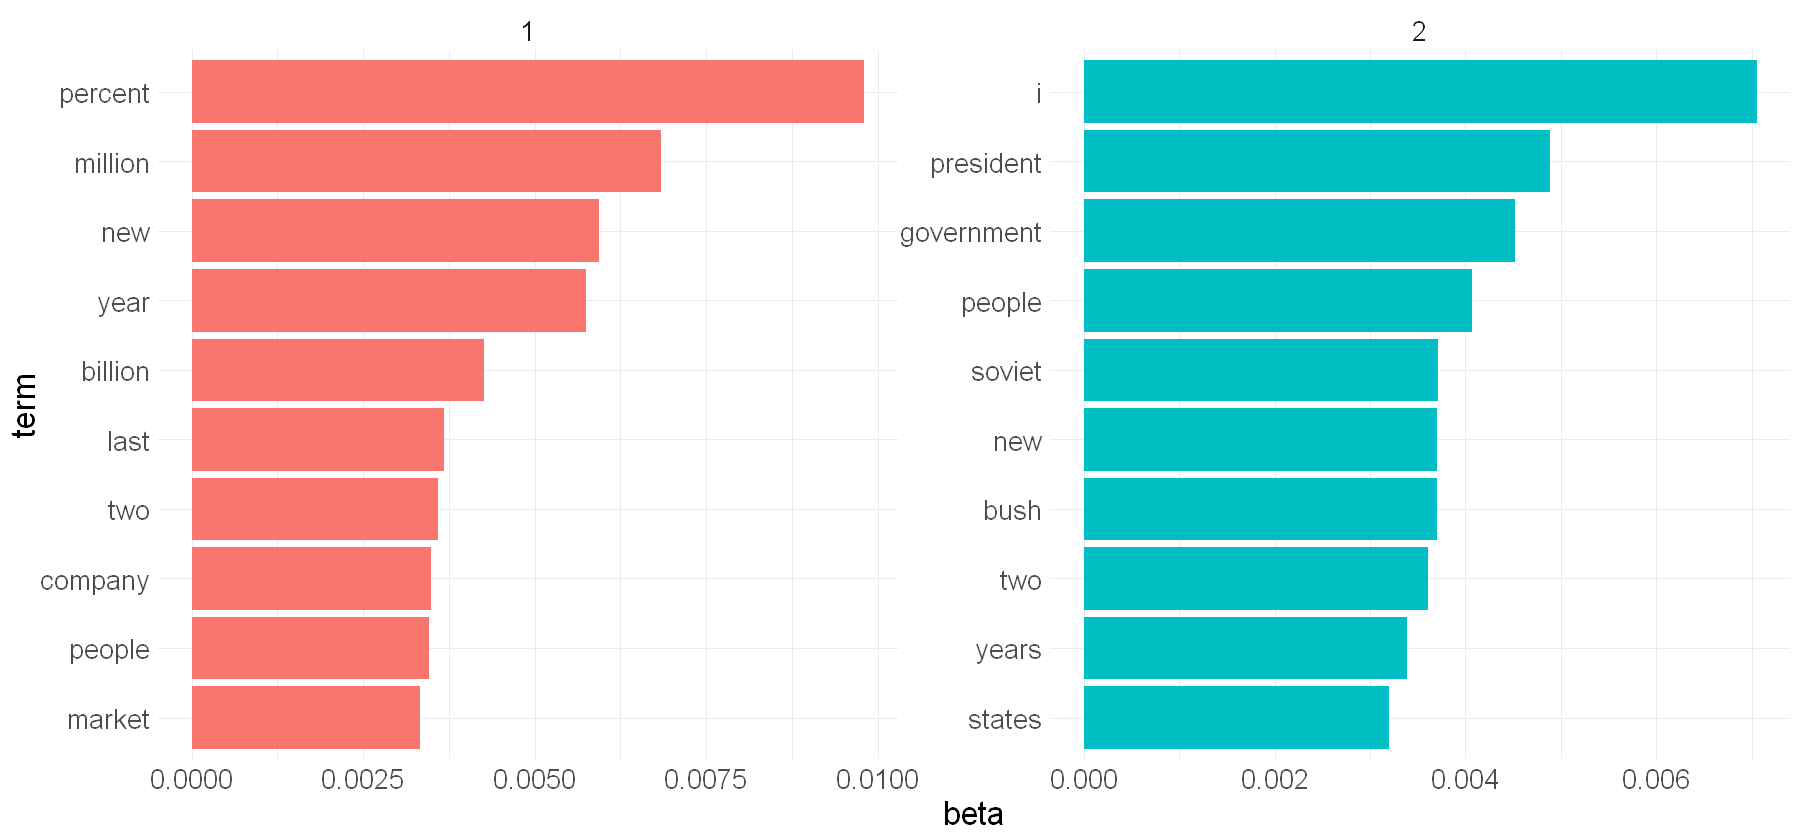

In [9]:
library(ggplot2)
library(dplyr)
library(repr)
options(repr.plot.width=15,repr.plot.heigth=10)
ap_top_terms <- ap_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

ap_top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  theme_minimal()+
  theme(text = element_text(size = 20))+
  scale_y_reordered()

Esta visualização permite compreender os dois tópicos extraídos dos artigos. As palavras mais comuns no tópico 1 incluem "por cento", "milhão", "bilhão" e "empresa", o que sugere que pode representar notícias de negócios ou financeiras. 

Os mais comuns no tópico 2 incluem "presidente", "governo" e "soviete", sugerindo que esse tópico representa notícias políticas. Uma observação importante sobre as palavras em cada tópico é que algumas palavras, como "novo" e "pessoas", são comuns em ambos os tópicos. 

Esta é uma vantagem da modelagem de tópicos em oposição aos métodos de "agrupamento rígido": tópicos usados ​​em linguagem natural podem ter alguma sobreposição em termos de palavras.

Como alternativa, podemos considerar os termos que tiveram a *maior diferença* em $\beta$ entre o tópico 1 e o tópico 2. 

Isso pode ser estimado com base na razão de log dos dois: $\log_2(\frac{\beta_2}{\beta_1})$ (uma proporção de log é útil porque faz a diferença simétrica: $\beta_2$ sendo duas vezes maior leva a uma proporção de log de 1, enquanto $\beta_1$ sendo duas vezes maior resulta em -1) . 

Para restringi-lo a um conjunto de palavras especialmente relevantes, podemos filtrar por palavras relativamente comuns, como aquelas que têm $\beta$ maior que 1/1000 em pelo menos um tópico.

In [11]:
library(tidyr)

beta_spread <- ap_topics %>%
  mutate(topic = paste0("topic", topic)) %>%
  spread(topic, beta) %>%
  filter(topic1 > .001 | topic2 > .001) %>%
  mutate(log_ratio = log2(topic2 / topic1))

head(beta_spread)

term,topic1,topic2,log_ratio
<chr>,<dbl>,<dbl>,<dbl>
administration,4.309502e-04,0.0013822436,1.6814189
ago,1.065216e-03,0.0008421279,-0.3390353
agreement,6.714984e-04,0.0010390238,0.6297728
aid,4.759043e-05,0.0010459576,4.4580091
air,2.136933e-03,0.0002966593,-2.8486628
american,2.030497e-03,0.0016838838,-0.2700405


In [12]:
beta_spread_ordered <- beta_spread %>% arrange(desc(log_ratio))

As palavras com maiores diferenças entre os dois tópicos são visualizadas na Figura a seguir Palavras com maior diferença em $\ beta$ entre o tópico 2 e o tópico 1

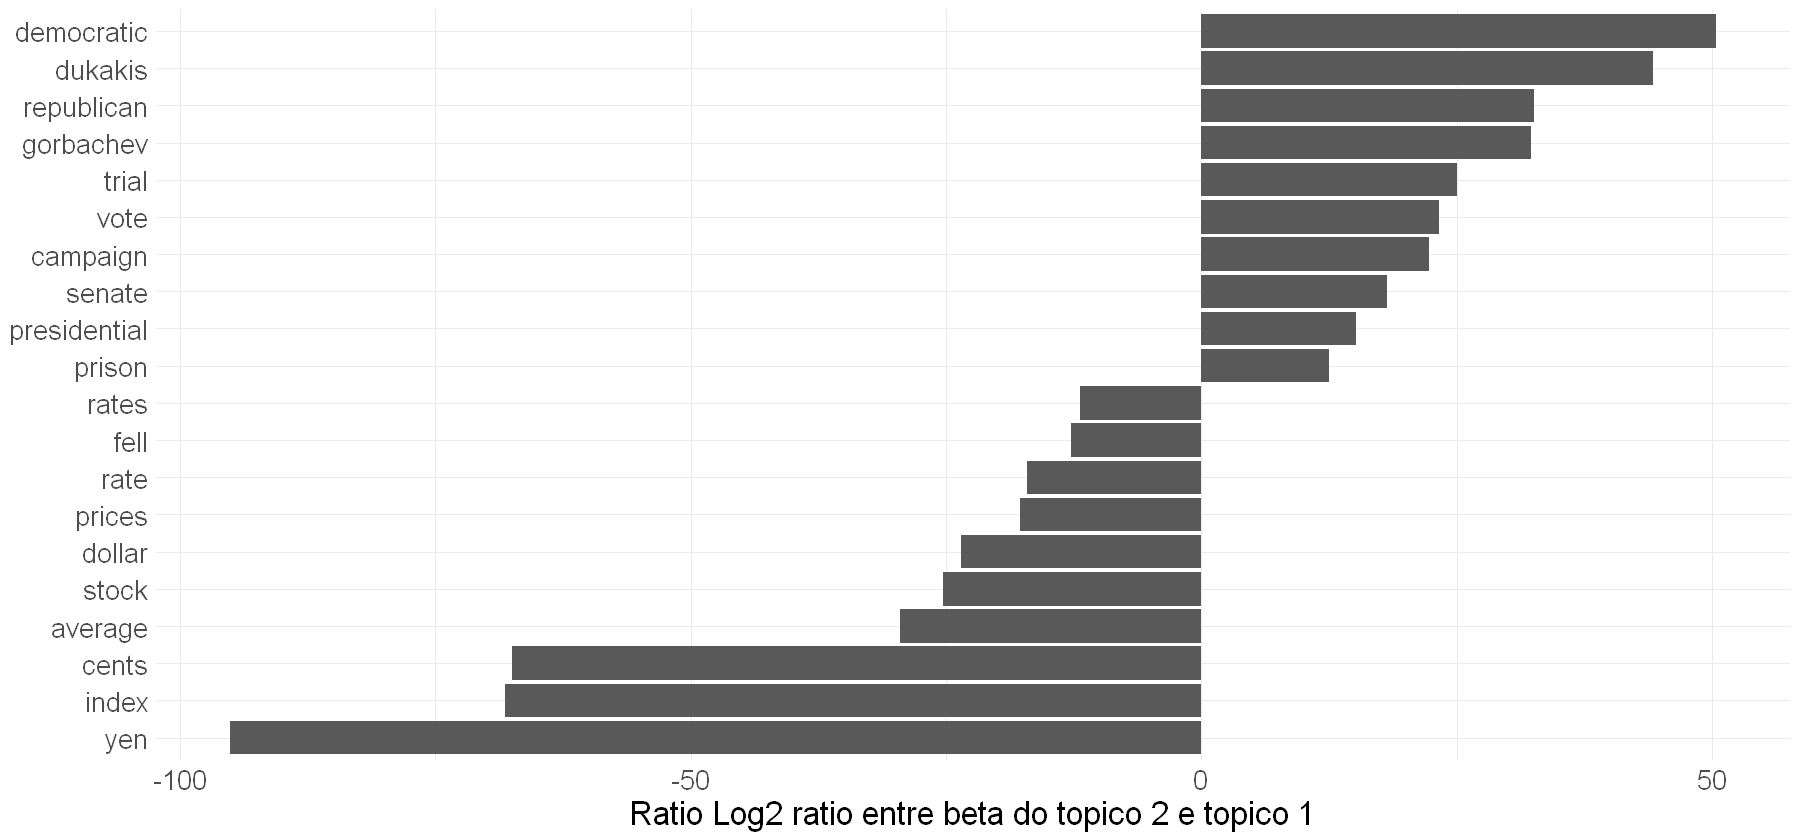

In [13]:
beta_spread %>%
  group_by(direction = log_ratio > 0) %>%
  top_n(10, abs(log_ratio)) %>%
  ungroup() %>%
  mutate(term = reorder(term, log_ratio)) %>%
  ggplot(aes(log_ratio, term)) +
  geom_col() +
  theme_minimal()+
  theme(text = element_text(size = 20))+
  labs(x = "Ratio Log2 ratio entre beta do topico 2 e topico 1", y = NULL)

Podemos ver que as palavras mais comuns no tópico 2 incluem partidos políticos como "democrático" e "republicano", bem como nomes de políticos como "dukakis" e "gorbachev".

O tópico 1 foi mais caracterizado por moedas como "iene" e "dólar", bem como termos financeiros como "índice", "preços" e "taxas". Isso ajuda a confirmar que os dois tópicos identificados pelo algoritmo eram notícias políticas e financeiras.

### Probabilidades de tópico de documento

Além de estimar cada tópico como uma mistura de palavras, 

o LDA também modela cada documento como uma mistura de tópicos. Podemos examinar as probabilidades por documento por tópico, chamadas $\gamma$ ("gamma"), com o argumento `matrix =" gamma "` para `tidy()`.

In [14]:
ap_documents <- tidy(ap_lda, matrix = "gamma")
head(ap_documents)

document,topic,gamma
<int>,<int>,<dbl>
1,1,0.2480616686
2,1,0.3615485445
3,1,0.5265844180
4,1,0.3566530023
5,1,0.1812766762
6,1,0.0005883388


Cada um desses valores é uma proporção estimada de palavras desse documento geradas a partir desse tópico. Por exemplo, o modelo estima que apenas cerca de $25%$ das palavras no documento 1 foram geradas a partir do tópico 1.

Podemos ver que muitos desses documentos foram extraídos de uma mistura dos dois tópicos, mas esse documento 6 foi extraído quase inteiramente do tópico 2, tendo $\gamma$ do tópico 1 próximo de zero. Para verificar esta resposta, podemos aplicar `tidy()` para obter aa matriz documento-termo e verificar quais são as palavras mais comuns naquele documento.

In [15]:
tidy(AssociatedPress) %>%
  filter(document == 6) %>%
  arrange(desc(count))

document,term,count
<int>,<chr>,<dbl>
6,noriega,16
6,panama,12
6,jackson,6
6,powell,6
6,administration,5
6,economic,5
6,general,5
6,i,5
6,panamanian,5


Com base nas palavras mais comuns, este parece ser um artigo sobre a relação entre o governo americano e o ditador panamenho Manuel Noriega, o que significa que o algoritmo acertou em colocá-lo no tópico 2 (como notícias políticas / nacionais).

## Exemplo: o grande assalto à biblioteca

Ao examinar um método estatístico, pode ser útil experimentá-lo em um caso muito simples em que você sabe a "resposta certa". Por exemplo, podemos coletar um conjunto de documentos que definitivamente se relacionam a quatro tópicos separados e, em seguida, realizar a modelagem de tópicos para ver se o algoritmo pode distinguir corretamente os quatro grupos. 

Isso nos permite verificar se o método é útil e ter uma noção de como e quando pode dar errado. Vamos tentar isso com alguns dados da literatura clássica.

Suponha que um vândalo tenha invadido seu escritório e destruído quatro de seus livros:

* * Grandes expectativas * por Charles Dickens
* * A Guerra dos Mundos * por H.G. Wells
* * Vinte Mil Léguas Submarinas * por Júlio Verne
* * Orgulho e Preconceito * por Jane Austen

Títulos originais

* *Great Expectations* by Charles Dickens
* *The War of the Worlds* by H.G. Wells
* *Twenty Thousand Leagues Under the Sea* by Jules Verne
* *Pride and Prejudice* by Jane Austen

Este vândalo rasgou os livros em capítulos individuais e os deixou em uma grande pilha. Como podemos restaurar esses capítulos desorganizados aos seus livros originais? Este é um problema desafiador, pois os capítulos individuais são ** sem rótulos **: não sabemos quais palavras podem distingui-los em grupos. Portanto, usaremos a modelagem de tópicos para descobrir como os capítulos se agrupam em tópicos distintos, cada um deles (presumivelmente) representando um dos livros.

Recuperaremos o texto desses quatro livros usando o pacote gutenbergr.

In [16]:
titles <- c("Twenty Thousand Leagues under the Sea", 
            "The War of the Worlds",
            "Pride and Prejudice", 
            "Great Expectations")

In [18]:
library(gutenbergr)

books <- gutenberg_works(title %in% titles) %>%
  gutenberg_download(meta_fields = "title")

Como pré-processamento, nós os dividimos em capítulos, usamos `unnest_tokens ()` do tidytext para separá-los em palavras e, em seguida, removemos `stop_words`. 

Estamos tratando cada capítulo como um "documento" separado, cada um com um nome como `Grandes expectativas_1` ou` Orgulho e preconceito_11`. (Em outros aplicativos, cada documento pode ser um artigo de jornal ou uma postagem de blog).

In [20]:
library(stringr)

# divide into documents, each representing one chapter
by_chapter <- books %>%
  group_by(title) %>%
  mutate(chapter = cumsum(str_detect(
    text, regex("^chapter ", ignore_case = TRUE)
  ))) %>%
  ungroup() %>%
  filter(chapter > 0) %>%
  unite(document, title, chapter)

# split into words
by_chapter_word <- by_chapter %>%
  unnest_tokens(word, text)

# find document-word counts
word_counts <- by_chapter_word %>%
  anti_join(stop_words) %>%
  count(document, word, sort = TRUE) %>%
  ungroup()

head(word_counts)

Joining, by = "word"



document,word,n
<chr>,<chr>,<int>
Great Expectations_57,joe,88
Great Expectations_7,joe,70
Great Expectations_17,biddy,63
Great Expectations_27,joe,58
Great Expectations_38,estella,58
Great Expectations_2,joe,56


### LDA nos capítulos

No momento, nosso quadro de dados `word_counts` está em uma forma organizada, com um termo por documento por linha, mas o pacote topicmodels requer um` DocumentTermMatrix`. 

Podemos lançar uma tabela de um token por linha em um `DocumentTermMatrix` com` cast_dtm() `do tidytext.

In [21]:
chapters_dtm <- word_counts %>%
  cast_dtm(document, word, n)

chapters_dtm

<<DocumentTermMatrix (documents: 193, terms: 18215)>>
Non-/sparse entries: 104722/3410773
Sparsity           : 97%
Maximal term length: 19
Weighting          : term frequency (tf)

Podemos então usar a função `LDA()` para criar um modelo de quatro tópicos. 

Nesse caso, sabemos que estamos procurando quatro tópicos porque há quatro livros; em outros problemas, podemos precisar tentar alguns valores diferentes de `k`.

In [22]:
chapters_lda <- LDA(chapters_dtm, k = 4, control = list(seed = 1234))
chapters_lda
#> A LDA_VEM topic model with 4 topics.

A LDA_VEM topic model with 4 topics.

Assim como fizemos com os dados da Associated Press, podemos examinar as probabilidades por tópico por palavra.

In [23]:
chapter_topics <- tidy(chapters_lda, matrix = "beta")
head(chapter_topics)
#> # A tibble: 72,860 x 3
#>    topic term        beta
#>    <int> <chr>      <dbl>
#>  1     1 joe     5.83e-17
#>  2     2 joe     3.19e-57
#>  3     3 joe     4.16e-24
#>  4     4 joe     1.45e- 2
#>  5     1 biddy   7.85e-27
#>  6     2 biddy   4.67e-69
#>  7     3 biddy   2.26e-46
#>  8     4 biddy   4.77e- 3
#>  9     1 estella 3.83e- 6
#> 10     2 estella 5.32e-65
#> # … with 72,850 more rows

topic,term,beta
<int>,<chr>,<dbl>
1,joe,1.436612e-17
2,joe,5.962111e-61
3,joe,9.881855e-25
4,joe,1.447329e-02
1,biddy,5.139275e-28
2,biddy,5.022015e-73


Observe que isso transformou o modelo em um formato de um tópico por termo por linha. Para cada combinação, o modelo calcula a probabilidade desse termo ser gerado a partir desse tópico. Por exemplo, o termo "joe" tem uma probabilidade quase zero de ser gerado a partir dos tópicos 1, 2 ou 3, mas representa $1%$ do tópico 4.

Poderíamos usar `top_n()` do dplyr para encontrar os 5 principais termos em cada tópico.

In [24]:
top_terms <- chapter_topics %>%
  group_by(topic) %>%
  top_n(5, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

head(top_terms)

topic,term,beta
<int>,<chr>,<dbl>
1,elizabeth,0.014101270
1,darcy,0.008810341
1,miss,0.008708777
1,bennet,0.006944344
1,jane,0.006494613
2,captain,0.015510635


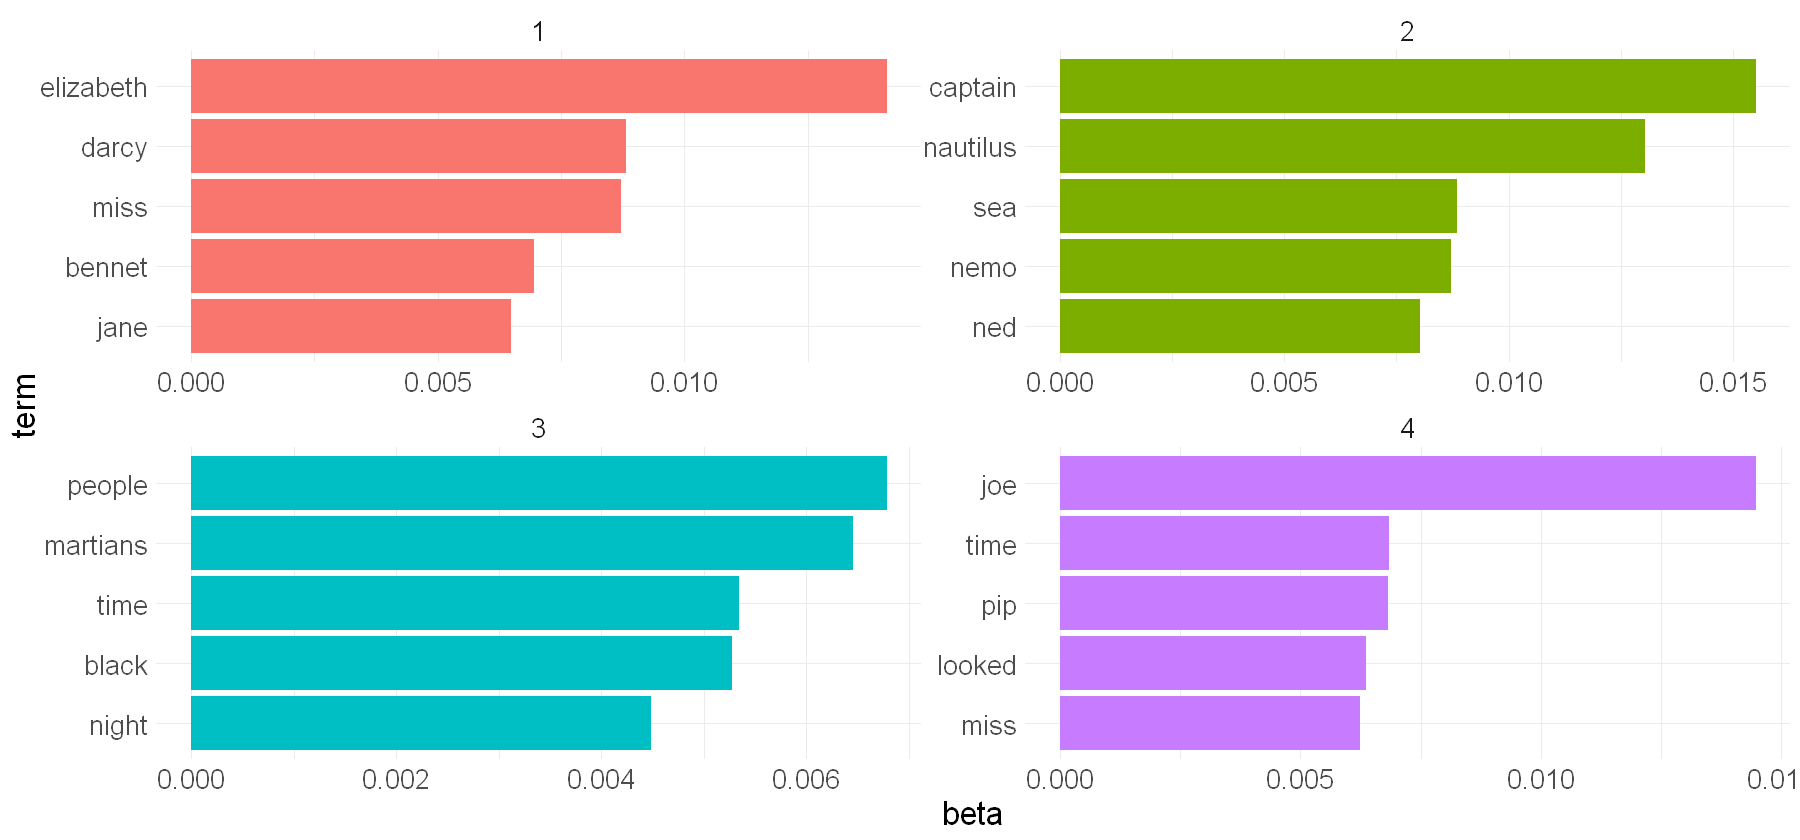

In [25]:
#Esta saída organizada (tidy) serve bem para uma visualização ggplot2

top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  theme_minimal()+
  theme(text = element_text(size = 20))+
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()

Esses tópicos estão claramente associados aos quatro livros!

Não há dúvida de que o tópico "capitão", "nautilus", "mar" e "nemo" pertence a * Vinte Mil Léguas Submarinas *, e que "jane", "darcy" e "Elizabeth" pertencem a *Orgulho e Preconceito*. Vemos "pip" e "joe" de * Great Expectations * e "martians", "black" e "night" de * The War of the Worlds *.

Notamos também que, em linha com o LDA sendo um método de "agrupamento fuzzy", pode haver palavras em comum entre vários tópicos, como "falta" nos tópicos 1 e 4, e "tempo" nos tópicos 3 e 4.

### Classificação por documento {# por documento}

Cada documento nesta análise representou um único capítulo. Assim, podemos querer saber quais tópicos estão associados a cada documento. Podemos colocar os capítulos de volta nos livros corretos? 

Podemos descobrir isso examinando as probabilidades por documento por tópico, $\gamma$ ("gamma").

In [26]:
chapters_gamma <- tidy(chapters_lda, matrix = "gamma")
head(chapters_gamma)

document,topic,gamma
<chr>,<int>,<dbl>
Great Expectations_57,1,1.338547e-05
Great Expectations_7,1,1.456215e-05
Great Expectations_17,1,2.096237e-05
Great Expectations_27,1,1.900804e-05
Great Expectations_38,1,3.552749e-01
Great Expectations_2,1,1.706715e-05


Cada um desses valores é uma proporção estimada de palavras desse documento geradas a partir desse tópico. Por exemplo, o modelo estima que cada palavra no documento `r chapters_gamma $ document [1]` tem apenas uma probabilidade de $0%$ de vir do tópico 1 (Orgulho e Preconceito).

Agora que temos essas probabilidades de tópico, podemos ver como nosso aprendizado não supervisionado se saiu ao distinguir os quatro livros. Esperamos que os capítulos de um livro sejam, em sua maioria (ou inteiramente), gerados a partir do tópico correspondente.

Primeiro, separamos novamente o nome do documento em título e capítulo, após o que podemos visualizar a probabilidade por documento por tópico para cada um que pode ser visto na Figura a seguir.

In [27]:
chapters_gamma <- chapters_gamma %>%
  separate(document, c("title", "chapter"), sep = "_", convert = TRUE)

head(chapters_gamma)

title,chapter,topic,gamma
<chr>,<int>,<int>,<dbl>
Great Expectations,57,1,1.338547e-05
Great Expectations,7,1,1.456215e-05
Great Expectations,17,1,2.096237e-05
Great Expectations,27,1,1.900804e-05
Great Expectations,38,1,3.552749e-01
Great Expectations,2,1,1.706715e-05


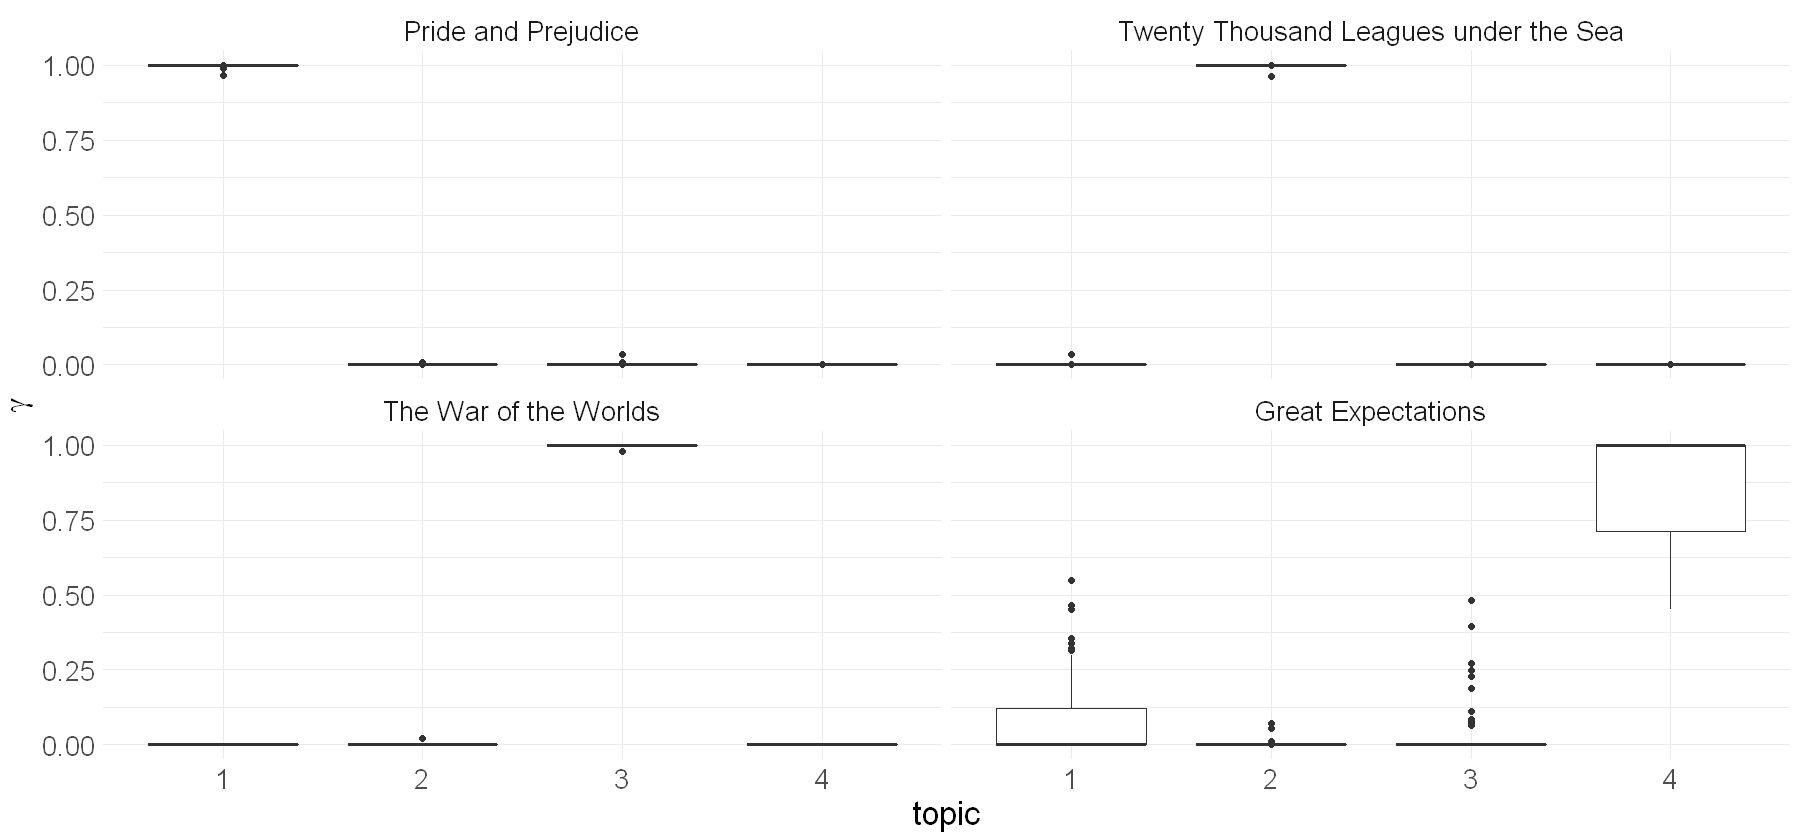

In [28]:
chapters_gamma %>%
  mutate(title = reorder(title, gamma * topic)) %>%
  ggplot(aes(factor(topic), gamma)) +
  geom_boxplot() +
  facet_wrap(~ title) +
  theme_minimal()+
  theme(text = element_text(size = 20))+
  labs(x = "topic", y = expression(gamma))

Notamos que quase todos os capítulos de *Orgulho e preconceito*, *Guerra dos Mundos* e *Vinte Mil Léguas Submarinas* foram identificados exclusivamente como um único tópico cada.

Parece que alguns capítulos de Grandes esperanças (que deveria ser o tópico 4) foram de alguma forma associados a outros tópicos. Há algum caso em que o tópico mais associado a um capítulo pertence a outro livro? 

Primeiro encontraríamos o tópico que estava mais associado a cada capítulo usando `top_n()`, que é efetivamente a "classificação" desse capítulo.

In [29]:
chapter_classifications <- chapters_gamma %>%
  group_by(title, chapter) %>%
  slice_max(gamma) %>%
  ungroup()

head(chapter_classifications)

title,chapter,topic,gamma
<chr>,<int>,<int>,<dbl>
Great Expectations,1,4,0.8114472
Great Expectations,2,4,0.9999488
Great Expectations,3,4,0.6602340
Great Expectations,4,4,0.9999503
Great Expectations,5,4,0.7144905
Great Expectations,6,4,0.9997701


Podemos então comparar cada um com o tópico de "consenso" de cada livro (o tópico mais comum entre seus capítulos) e ver quais foram identificados erroneamente.

In [30]:
book_topics <- chapter_classifications %>%
  count(title, topic) %>%
  group_by(title) %>%
  top_n(1, n) %>%
  ungroup() %>%
  transmute(consensus = title, topic)

chapter_classifications %>%
  inner_join(book_topics, by = "topic") %>%
  filter(title != consensus)

title,chapter,topic,gamma,consensus
<chr>,<int>,<int>,<dbl>,<chr>
Great Expectations,23,1,0.5470853,Pride and Prejudice
Great Expectations,54,3,0.4812041,The War of the Worlds


Vemos que apenas dois capítulos de *Grandes expectativas* foram classificados incorretamente, pois LDA descreveu um como proveniente do tópico "Orgulho e Preconceito" (tópico 1) e um de A Guerra dos Mundos (tópico 3). Isso não é ruim para agrupamento não supervisionado!

### Por atribuições de palavras:

Uma etapa do algoritmo LDA é atribuir cada palavra em cada documento a um tópico. 

Quanto mais palavras em um documento forem atribuídas a esse tópico, geralmente, mais peso (`gama`) terá na classificação do documento-tópico.

Podemos querer pegar os pares documento-palavra original e descobrir quais palavras em cada documento foram atribuídas a cada tópico. 

Este é o trabalho da função `augment ()`, que também se originou no pacote da bloor como uma forma de organizar a saída do modelo. 

Enquanto `tidy()` recupera os componentes estatísticos do modelo, `augment()` usa um modelo para adicionar informações a cada observação nos dados originais.

In [31]:
assignments <- augment(chapters_lda, data = chapters_dtm)
head(assignments)

document,term,count,.topic
<chr>,<chr>,<dbl>,<dbl>
Great Expectations_57,joe,88,4
Great Expectations_7,joe,70,4
Great Expectations_17,joe,5,4
Great Expectations_27,joe,58,4
Great Expectations_2,joe,56,4
Great Expectations_23,joe,1,4


Isso retorna um tidy data frame de contagens de termos do livro, mas adiciona uma coluna extra: `.topic`, com o tópico ao qual cada termo foi atribuído em cada documento. (

Colunas extras adicionadas por `augment` sempre começam com` .`, para evitar sobrescrever colunas existentes). 

Podemos combinar esta tabela de `assignments` com os títulos dos livros de consenso para descobrir quais palavras foram classificadas incorretamente.

In [32]:
assignments <- assignments %>%
  separate(document, c("title", "chapter"), 
           sep = "_", convert = TRUE) %>%
  inner_join(book_topics, by = c(".topic" = "topic"))

head(assignments)


title,chapter,term,count,.topic,consensus
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
Great Expectations,57,joe,88,4,Great Expectations
Great Expectations,7,joe,70,4,Great Expectations
Great Expectations,17,joe,5,4,Great Expectations
Great Expectations,27,joe,58,4,Great Expectations
Great Expectations,2,joe,56,4,Great Expectations
Great Expectations,23,joe,1,4,Great Expectations


Esta combinação do livro verdadeiro (`title`) e o livro atribuído a ele (`consensus`) é útil para uma exploração posterior. Podemos, por exemplo, visualizar uma **matriz de confusão**, mostrando a frequência com que palavras de um livro foram atribuídas a outro, usando `count()` de dplyr e `geom_tile` de ggplot2.

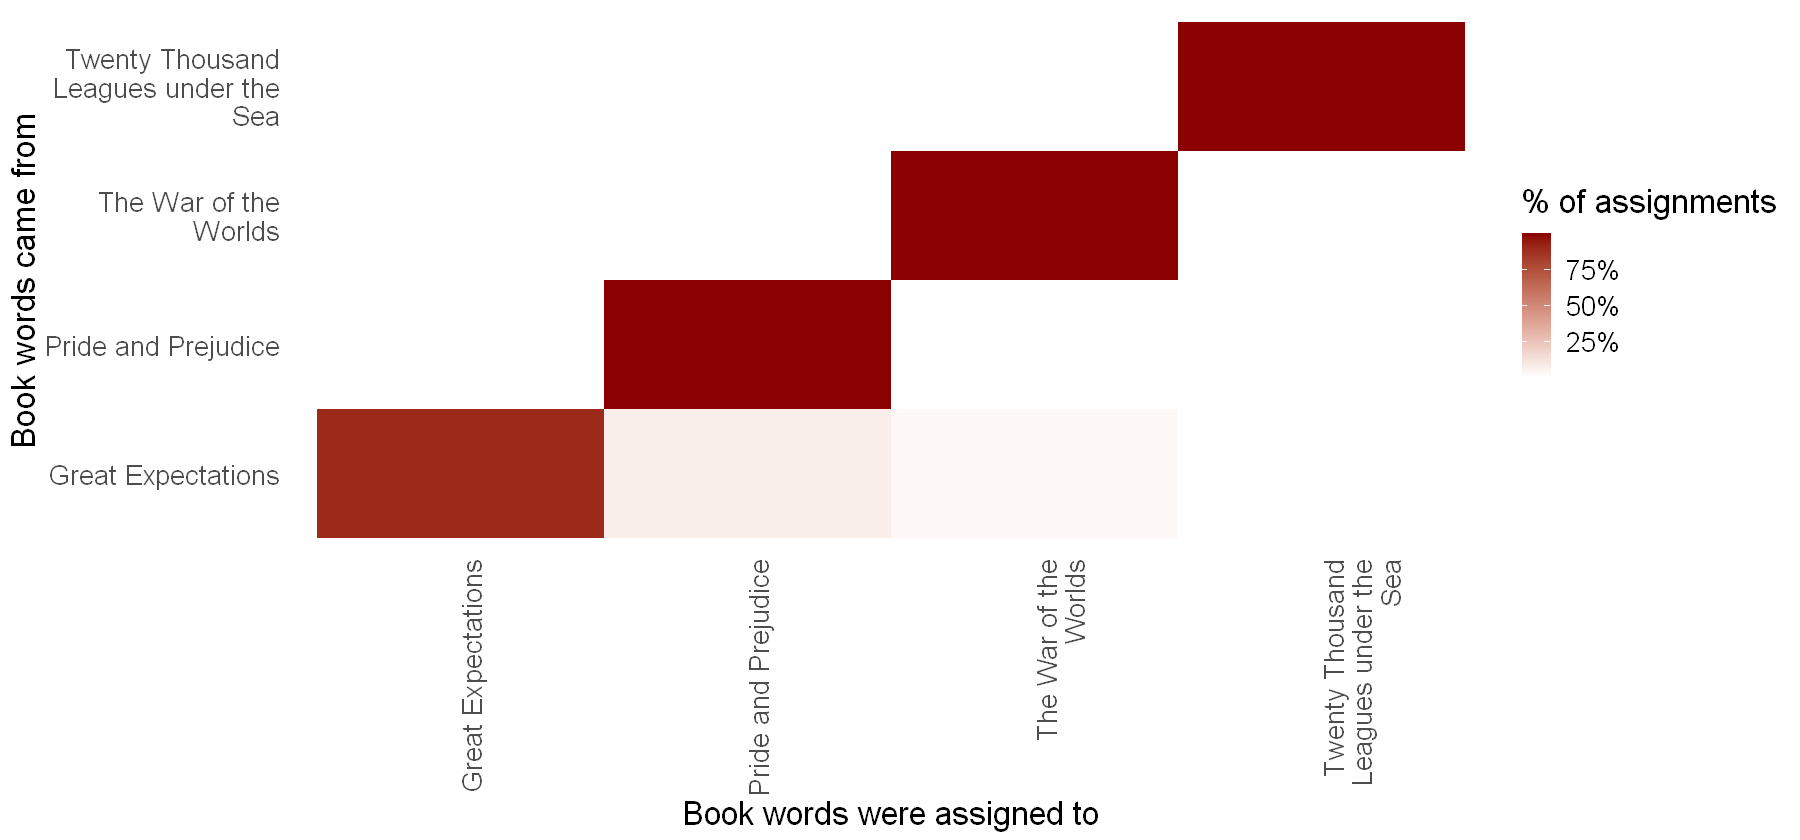

In [33]:
library(scales)

assignments %>%
  count(title, consensus, wt = count) %>%
  mutate(across(c(title, consensus), ~str_wrap(., 20))) %>%
  group_by(title) %>%
  mutate(percent = n / sum(n)) %>%
  ggplot(aes(consensus, title, fill = percent)) +
  geom_tile() +
  scale_fill_gradient2(high = "darkred", label = percent_format()) +
  theme_minimal()+
  theme(text = element_text(size = 20))+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        panel.grid = element_blank()) +
  labs(x = "Book words were assigned to",
       y = "Book words came from",
       fill = "% of assignments")

Notamos que quase todas as palavras para *Orgulho e Preconceito*, *Vinte Mil Léguas Submarinas* e *Guerra dos Mundos* foram atribuídas corretamente, enquanto *Grandes Expectativas* tinham um bom número de palavras mal atribuídas (que, como como vimos acima, levou à classificação incorreta de dois capítulos).

Quais foram as palavras erradas mais comumente?

In [34]:
wrong_words <- assignments %>%
  filter(title != consensus)

wrong_words

wrong_words %>%
  count(title, consensus, term, wt = count) %>%
  ungroup() %>%
  arrange(desc(n))

title,chapter,term,count,.topic,consensus
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
Great Expectations,38,brother,2,1,Pride and Prejudice
Great Expectations,22,brother,4,1,Pride and Prejudice
Great Expectations,23,miss,2,1,Pride and Prejudice
Great Expectations,22,miss,23,1,Pride and Prejudice
Twenty Thousand Leagues under the Sea,8,miss,1,1,Pride and Prejudice
Great Expectations,31,miss,1,1,Pride and Prejudice
Great Expectations,5,sergeant,37,1,Pride and Prejudice
Great Expectations,46,captain,1,2,Twenty Thousand Leagues under the Sea
Great Expectations,32,captain,1,2,Twenty Thousand Leagues under the Sea


title,consensus,term,n
<chr>,<chr>,<chr>,<dbl>
Great Expectations,Pride and Prejudice,love,44
Great Expectations,Pride and Prejudice,sergeant,37
Great Expectations,Pride and Prejudice,lady,32
Great Expectations,Pride and Prejudice,miss,26
Great Expectations,The War of the Worlds,boat,25
Great Expectations,The War of the Worlds,tide,20
Great Expectations,The War of the Worlds,water,20
Great Expectations,Pride and Prejudice,father,19
Great Expectations,Pride and Prejudice,baby,18


Podemos ver que várias palavras eram frequentemente atribuídas ao agrupamento Orgulho e Preconceito ou Guerra dos Mundos, mesmo quando apareciam em Grandes Esperanças. 

Para algumas dessas palavras, como "amor" e "senhora", é porque são mais comuns em Orgulho e preconceito (poderíamos confirmar isso examinando as contagens).

Por outro lado, existem algumas palavras classificadas incorretamente que nunca apareceram no romance a que foram atribuídas. Por exemplo, podemos confirmar que "flopson" aparece apenas em * Grandes Esperanças *, embora esteja atribuído ao grupo "Orgulho e Preconceito".

In [35]:
word_counts %>%
  filter(word == "flopson")

document,word,n
<chr>,<chr>,<int>
Great Expectations_22,flopson,10
Great Expectations_23,flopson,7
Great Expectations_33,flopson,1


O algoritmo LDA é estocástico e pode acidentalmente pousar em um tópico que abrange vários livros.

## Implementações alternativas de LDA

A função `LDA ()` no pacote topicmodels é apenas uma implementação do algoritmo de alocação de Dirichlet latente. Por exemplo, o pacote [mallet] (https://cran.r-project.org/package=mallet) [@ R-mallet] implementa um invólucro em torno do [MALLET] (http: //mallet.cs.umass. edu /) pacote Java para ferramentas de classificação de texto, e o pacote tidytext fornece tidiers para a saída deste modelo também.

O pacote do mallet tem uma abordagem um pouco diferente para o formato de entrada. 

Por exemplo, ele pega documentos não tokenizados e realiza a própria tokenização, e requer um arquivo separado de palavras irrelevantes. 

Isso significa que temos que recolher o texto em uma string para cada documento antes de executar o LDA.

In [36]:
library(dplyr)
library(tidytext)
library(stringr)

library(ggplot2)
theme_set(theme_light())

In [37]:
install.packages("mallet")

Installing package into 'C:/Users/domin/OneDrive/Documentos/R/win-library/4.0'
(as 'lib' is unspecified)



package 'mallet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\domin\AppData\Local\Temp\Rtmpe8LEYh\downloaded_packages


In [38]:
library(mallet)
# create a vector with one string per chapter
collapsed <- by_chapter_word %>%
  anti_join(stop_words, by = "word") %>%
  mutate(word = str_replace(word, "'", "")) %>%
  group_by(document) %>%
  summarize(text = paste(word, collapse = " "))

# create an empty file of "stopwords"
file.create(empty_file <- tempfile())
docs <- mallet.import(collapsed$document, collapsed$text, empty_file)

mallet_model <- MalletLDA(num.topics = 4)
mallet_model$loadDocuments(docs)
mallet_model$train(100)

Warning message:
"package 'mallet' was built under R version 4.0.3"
Loading required package: rJava

Warning message:
"package 'rJava' was built under R version 4.0.3"
`summarise()` ungrouping output (override with `.groups` argument)



[1] TRUE

Uma vez que o modelo é criado, no entanto, podemos usar as funções `tidy ()` e `augment ()` descritas no resto do capítulo de uma maneira quase idêntica. Isso inclui extrair as probabilidades de palavras em cada tópico ou tópicos em cada documento.

In [39]:
# word-topic pairs
tidy(mallet_model)

# document-topic pairs
tidy(mallet_model, matrix = "gamma")

# column needs to be named "term" for "augment"
term_counts <- rename(word_counts, term = word)
augment(mallet_model, term_counts)

Warning message:
"`tbl_df()` is deprecated as of dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


topic,term,beta
<int>,<chr>,<dbl>
1,chapter,2.388764e-07
2,chapter,9.869617e-04
3,chapter,2.568594e-03
4,chapter,1.721584e-03
1,fathers,2.388764e-07
2,fathers,3.182721e-07
3,fathers,3.170712e-07
4,fathers,6.729235e-04
1,family,2.388764e-07


document,topic,gamma
<chr>,<int>,<dbl>
Great Expectations_1,1,0.5289292
Great Expectations_10,1,0.5058570
Great Expectations_11,1,0.3817485
Great Expectations_12,1,0.4157183
Great Expectations_13,1,0.4351124
Great Expectations_14,1,0.4272541
Great Expectations_15,1,0.4310542
Great Expectations_16,1,0.4589679
Great Expectations_17,1,0.3755618


document,term,n,.topic
<chr>,<chr>,<int>,<int>
Great Expectations_57,joe,88,1
Great Expectations_7,joe,70,1
Great Expectations_17,biddy,63,4
Great Expectations_27,joe,58,1
Great Expectations_38,estella,58,4
Great Expectations_2,joe,56,1
Great Expectations_23,pocket,53,4
Great Expectations_15,joe,50,1
Great Expectations_18,joe,50,1
